# Solution to Question 01 : 
Given historical data, your assignment is to build a predictive model to predict Straddle Open, High, Low, Close data for the next day. I.e. Today is Modnay (11-03-2024) and NIFTY expiry is on Thursday(14-03-2024). Tuesday(12-03-2024) being 2dte, we want to predict Open, High, Low, Close of Straddle prices (Not the index).

## Models Used :
### 1. Random Forest Regressor
### 2. LSTM (Long Short-Term Memory) Model

### Importing Libraries

In [262]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import requests

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor



### Defining API endpoints and fetching data from them 

In [263]:

# Defining API endpoints for data retrieval
expiry_api = "https://live.markethound.in/api/history/expiries"
decay_api = "https://live.markethound.in/api/history/decay"
dte_list_api = "https://live.markethound.in/api/history/dtelist"

# Function to fetch data from API
def fetch_data(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print("Error fetching data from API:", response.status_code)
        return None

# Fetch expiry dates for the index
index = "FINNIFTY"  # Change index as needed
expiry_data = fetch_data(expiry_api)
expiry_data_list = expiry_data['result']

# Fetch historical straddle decay data
expiry_date = expiry_data_list[0]  # Assuming the first expiry date
decay_data = fetch_data(decay_api + f"?name={index}&expiry={expiry_date}&dte=0")

# # Fetch days to expiry list
dte_list = fetch_data(dte_list_api + f"?index={index}&expiry={expiry_date}")

print(expiry_date)
print(decay_data)
print(dte_list)

2024-03-14T00:00:00.000Z
{'status': 'success', 'message': 'Expiries retrieved successfully.', 'result': [{'_id': '65f043e5301dfda3b6463971', 'daysToExpiry': 0, 'expiry': '2024-03-12T00:00:00.000Z', 'index': 'FINNIFTY', 'close': '2.30', 'date': '2024-03-12T00:00:00.000Z', 'high': '171.00', 'index_close': '20899.75', 'index_high': '21054.35', 'index_low': '20682.35', 'index_open': '20847.15', 'intradayMovement': '372.00', 'intradayTotal': '98.40', 'low': '2.00', 'open': '100.70', 'overnightExpected': 0, 'overnightGap': 0}, {'_id': '65e70d796f2fdc852f723066', 'daysToExpiry': 0, 'expiry': '2024-03-05T00:00:00.000Z', 'index': 'FINNIFTY', 'close': '4.40', 'date': '2024-03-05T00:00:00.000Z', 'high': '117.95', 'index_close': '20858.10', 'index_high': '20951.55', 'index_low': '20822.10', 'index_open': '20842.10', 'intradayMovement': '129.45', 'intradayTotal': '112.35', 'low': '3.75', 'open': '116.75', 'overnightExpected': 0, 'overnightGap': 0}, {'_id': '65ddd17c1a3e664783907ff0', 'daysToExpiry'

# 1. **Using Random Forest Regressor**

### Training Model using API for dtelist given in the question

In [264]:
expiry_date = '2024-03-05T00:00:00.000Z'
temp_dte_list = fetch_data(dte_list_api + f"?index={index}&expiry={expiry_date}")
df = pd.DataFrame(temp_dte_list['result'])
# df = df[df['daysToExpiry']<=4] 

## Data Preprocessing

In [265]:

# Preprocessing the data
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df

,_id,daysToExpiry,expiry,index,close,date,high,index_close,index_high,index_low,index_open,intradayMovement,intradayTotal,low,open,overnightExpected,overnightGap
9,65e70d796f2fdc852f72310a,9,2024-03-05T00:00:00.000Z,FINNIFTY,538.20,2024-02-21 00:00:00+00:00,590.65,20640.75,20872.45,20634.25,20838.40,238.20,-32.05,506.15,506.15,43.30,12.60
8,65e70d796f2fdc852f7230fc,8,2024-03-05T00:00:00.000Z,FINNIFTY,487.00,2024-02-22 00:00:00+00:00,1000000.00,20689.55,20698.70,20452.30,20628.15,246.40,7.90,466.90,494.90,-4.75,4.55
7,65e70d796f2fdc852f7230eb,7,2024-03-05T00:00:00.000Z,FINNIFTY,452.15,2024-02-23 00:00:00+00:00,501.35,20664.70,20793.65,20647.60,20685.00,146.05,39.60,431.00,491.75,-0.80,-28.05
6,65e70d796f2fdc852f7230d8,6,2024-03-05T00:00:00.000Z,FINNIFTY,435.80,2024-02-26 00:00:00+00:00,483.90,20613.45,20719.00,20599.65,20692.75,119.35,17.15,425.30,452.95,24.45,34.35
5,65e70d796f2fdc852f7230c8,5,2024-03-05T00:00:00.000Z,FINNIFTY,394.45,2024-02-27 00:00:00+00:00,451.90,20564.90,20626.10,20535.00,20579.10,91.10,16.90,394.45,411.35,17.55,-11.10
4,65e70d796f2fdc852f7230b0,4,2024-03-05T00:00:00.000Z,FINNIFTY,403.40,2024-02-28 00:00:00+00:00,416.50,20318.40,20625.75,20317.80,20576.00,307.95,-26.50,339.80,376.90,12.40,11.10
3,65e70d796f2fdc852f7230a4,3,2024-03-05T00:00:00.000Z,FINNIFTY,275.60,2024-02-29 00:00:00+00:00,391.00,20469.95,20489.40,20242.75,20307.30,246.65,115.40,271.55,391.00,6.80,-88.95
2,65e70d796f2fdc852f72308d,2,2024-03-05T00:00:00.000Z,FINNIFTY,237.50,2024-03-01 00:00:00+00:00,277.90,20821.00,20859.20,20540.15,20558.90,319.05,31.30,236.20,268.80,37.90,-48.45
1,65e70d796f2fdc852f723079,1,2024-03-05T00:00:00.000Z,FINNIFTY,133.20,2024-03-04 00:00:00+00:00,206.95,20916.40,20952.95,20813.45,20869.45,139.50,66.40,133.20,199.60,16.45,74.30
0,65e70d796f2fdc852f723066,0,2024-03-05T00:00:00.000Z,FINNIFTY,4.40,2024-03-05 00:00:00+00:00,117.95,20858.10,20951.55,20822.10,20842.10,129.45,112.35,3.75,116.75,0,0


### Using Winsorization to handle extreme values 
    On observation it was found that df['high'] had an extreme value (1000000.00) . So, using winsorization to handle it
    
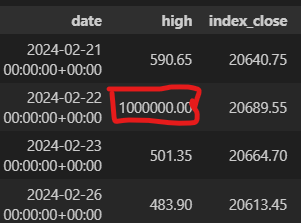
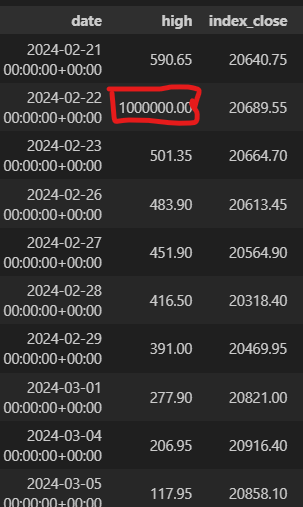

In [266]:
winsorized_df = df.copy()
# Convert columns to numeric type
winsorized_df['open'] = pd.to_numeric(winsorized_df['open'], errors='coerce')
winsorized_df['high'] = pd.to_numeric(winsorized_df['high'], errors='coerce')
winsorized_df['low'] = pd.to_numeric(winsorized_df['low'], errors='coerce')
winsorized_df['close'] = pd.to_numeric(winsorized_df['close'], errors='coerce')


# Applying winsorization to handle extreme values
threshold = 0.75  # Percentile threshold for winsorization
winsorized_df['open'] = winsorized_df['open'].clip(winsorized_df['open'].quantile(1 - threshold), winsorized_df['open'].quantile(threshold))
winsorized_df['high'] = winsorized_df['high'].clip(winsorized_df['high'].quantile(1 - threshold), winsorized_df['high'].quantile(threshold))
winsorized_df['low'] = winsorized_df['low'].clip(winsorized_df['low'].quantile(1 - threshold), winsorized_df['low'].quantile(threshold))
winsorized_df['close'] = winsorized_df['close'].clip(winsorized_df['close'].quantile(1 - threshold), winsorized_df['close'].quantile(threshold))

winsorized_df

,_id,daysToExpiry,expiry,index,close,date,high,index_close,index_high,index_low,index_open,intradayMovement,intradayTotal,low,open,overnightExpected,overnightGap
9,65e70d796f2fdc852f72310a,9,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-21 00:00:00+00:00,496.9875,20640.75,20872.45,20634.25,20838.40,238.20,-32.05,429.5750,482.050,43.30,12.60
8,65e70d796f2fdc852f7230fc,8,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-22 00:00:00+00:00,496.9875,20689.55,20698.70,20452.30,20628.15,246.40,7.90,429.5750,482.050,-4.75,4.55
7,65e70d796f2fdc852f7230eb,7,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-23 00:00:00+00:00,496.9875,20664.70,20793.65,20647.60,20685.00,146.05,39.60,429.5750,482.050,-0.80,-28.05
6,65e70d796f2fdc852f7230d8,6,2024-03-05T00:00:00.000Z,FINNIFTY,435.8000,2024-02-26 00:00:00+00:00,483.9000,20613.45,20719.00,20599.65,20692.75,119.35,17.15,425.3000,452.950,24.45,34.35
5,65e70d796f2fdc852f7230c8,5,2024-03-05T00:00:00.000Z,FINNIFTY,394.4500,2024-02-27 00:00:00+00:00,451.9000,20564.90,20626.10,20535.00,20579.10,91.10,16.90,394.4500,411.350,17.55,-11.10
4,65e70d796f2fdc852f7230b0,4,2024-03-05T00:00:00.000Z,FINNIFTY,403.4000,2024-02-28 00:00:00+00:00,416.5000,20318.40,20625.75,20317.80,20576.00,307.95,-26.50,339.8000,376.900,12.40,11.10
3,65e70d796f2fdc852f7230a4,3,2024-03-05T00:00:00.000Z,FINNIFTY,275.6000,2024-02-29 00:00:00+00:00,391.0000,20469.95,20489.40,20242.75,20307.30,246.65,115.40,271.5500,391.000,6.80,-88.95
2,65e70d796f2fdc852f72308d,2,2024-03-05T00:00:00.000Z,FINNIFTY,247.0250,2024-03-01 00:00:00+00:00,306.1750,20821.00,20859.20,20540.15,20558.90,319.05,31.30,245.0375,295.825,37.90,-48.45
1,65e70d796f2fdc852f723079,1,2024-03-05T00:00:00.000Z,FINNIFTY,247.0250,2024-03-04 00:00:00+00:00,306.1750,20916.40,20952.95,20813.45,20869.45,139.50,66.40,245.0375,295.825,16.45,74.30
0,65e70d796f2fdc852f723066,0,2024-03-05T00:00:00.000Z,FINNIFTY,247.0250,2024-03-05 00:00:00+00:00,306.1750,20858.10,20951.55,20822.10,20842.10,129.45,112.35,245.0375,295.825,0,0


### Selecting Features, Model and evaluation

In [269]:

# Feature Engineering

X = winsorized_df[['open' , 'high' , 'low' , 'close' , 'daysToExpiry', 'intradayMovement', 'intradayTotal', 'overnightExpected', 'overnightGap']]

# Target Variables
y = winsorized_df[['open', 'high', 'low', 'close']]

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)


r2_open = r2_score(y_test['open'], y_pred[:, 0])
r2_high = r2_score(y_test['high'], y_pred[:, 1])
r2_low = r2_score(y_test['low'], y_pred[:, 2])
r2_close = r2_score(y_test['close'], y_pred[:, 3])

print("R-squared (R2) value for Open:", r2_open)
print("R-squared (R2) value for High:", r2_high)
print("R-squared (R2) value for Low:", r2_low)
print("R-squared (R2) value for Close:", r2_close)


Root Mean Squared Error: 31.698214586990943
R-squared (R2) value for Open: 0.8403071747886347
R-squared (R2) value for High: 0.8809731834376213
R-squared (R2) value for Low: 0.8912846916069888
R-squared (R2) value for Close: 0.7542235797502292


In [150]:

# Prediction for the next day
# The code below can be used after defing X_next_day with feature data for the next day to make next day predictions 
# Assuming 'X_next_day' contains feature data for the next day
# next_day_prediction = model.predict(X_next_day)
# print("Predicted Straddle Prices for the Next Day:", next_day_prediction)


### Training the model for all the data from the decay_api

In [270]:
combined_df = pd.DataFrame()
for i in range(10):
    temp_decay_data = fetch_data(decay_api + f"?name={index}&expiry={expiry_date}&dte={i}")
    temp_df_2 = pd.DataFrame(temp_decay_data['result'])
    combined_df = pd.concat([combined_df,temp_df_2],ignore_index=True)
    
# combined_df

In [271]:
combined_df.head(5)

,_id,daysToExpiry,expiry,index,close,date,high,index_close,index_high,index_low,index_open,intradayMovement,intradayTotal,low,open,overnightExpected,overnightGap
0,65e70d796f2fdc852f723066,0,2024-03-05T00:00:00.000Z,FINNIFTY,4.40,2024-03-05T00:00:00.000Z,117.95,20858.10,20951.55,20822.10,20842.10,129.45,112.35,3.75,116.75,0,0
1,65ddd17c1a3e664783907ff0,0,2024-02-27T00:00:00.000Z,FINNIFTY,2.70,2024-02-27T00:00:00.000Z,152.45,20564.90,20626.10,20535.00,20579.10,91.10,135.55,2.15,138.25,0,0
2,65d498e81a3e664783d75308,0,2024-02-20T00:00:00.000Z,FINNIFTY,1.25,2024-02-20T00:00:00.000Z,143.60,20812.45,20815.20,20494.75,20496.35,320.45,109.80,1.25,111.05,0,0
3,65cb5c132f6ea590e695fd4f,0,2024-02-13T00:00:00.000Z,FINNIFTY,9.90,2024-02-13T00:00:00.000Z,132.85,20151.30,20267.85,19935.85,19961.30,332.00,111.50,5.35,121.40,0,0
4,65c221202f6ea590e6c277bd,0,2024-02-06T00:00:00.000Z,FINNIFTY,15.35,2024-02-06T00:00:00.000Z,148.55,20386.15,20386.15,20247.95,20261.60,138.20,133.20,9.15,148.55,0,0


### Preprocessing

In [272]:
# Preprocessing the data
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df.sort_values(by='date', inplace=True)
combined_df.reset_index(drop=True, inplace=True)
combined_df.dropna(inplace=True)
combined_df.drop_duplicates(inplace=True)

combined_df

,_id,daysToExpiry,expiry,index,close,date,high,index_close,index_high,index_low,index_open,intradayMovement,intradayTotal,low,open,overnightExpected,overnightGap
0,65b8e4d13fef031d7fc68295,9,2024-01-30T00:00:00.000Z,FINNIFTY,466.90,2024-01-16 00:00:00+00:00,517.85,21439.15,21510.30,21423.40,21444.75,86.90,45.55,458.25,512.45,-126.90,461.30
1,65cb5c132f6ea590e695fe0a,9,2024-02-13T00:00:00.000Z,FINNIFTY,1000000.00,2024-01-31 00:00:00+00:00,1000000.00,20476.20,20585.00,20165.05,20207.50,419.95,-999483.10,516.90,516.90,999513.75,-50.70
2,65cb5c132f6ea590e695fdfa,8,2024-02-13T00:00:00.000Z,FINNIFTY,457.25,2024-02-01 00:00:00+00:00,1000000.00,20517.70,20567.05,20374.00,20526.90,193.05,29.00,457.25,486.25,-8.45,-156.60
3,65c221202f6ea590e6c27802,3,2024-02-06T00:00:00.000Z,FINNIFTY,285.90,2024-02-01 00:00:00+00:00,478.15,20517.70,20567.05,20374.00,20526.90,193.05,170.35,283.30,456.25,24.85,-156.60
4,65cb5c132f6ea590e695fde9,7,2024-02-13T00:00:00.000Z,FINNIFTY,417.10,2024-02-02 00:00:00+00:00,1000000.00,20414.15,20814.45,20412.60,20674.30,401.85,48.60,340.30,465.70,-37.65,54.55
5,65c221202f6ea590e6c277e5,2,2024-02-06T00:00:00.000Z,FINNIFTY,240.50,2024-02-02 00:00:00+00:00,276.35,20414.15,20814.45,20412.60,20674.30,401.85,20.55,235.90,261.05,7.90,54.55
6,65cb5c132f6ea590e695fdd4,6,2024-02-13T00:00:00.000Z,FINNIFTY,383.45,2024-02-05 00:00:00+00:00,455.10,20303.90,20450.55,20263.80,20359.60,186.75,71.30,371.95,454.75,-18.05,42.30
7,65c221202f6ea590e6c277d4,1,2024-02-06T00:00:00.000Z,FINNIFTY,172.85,2024-02-05 00:00:00+00:00,242.85,20303.90,20450.55,20263.80,20359.60,186.75,59.75,170.20,232.60,24.30,42.30
8,65c221202f6ea590e6c277bd,0,2024-02-06T00:00:00.000Z,FINNIFTY,15.35,2024-02-06 00:00:00+00:00,148.55,20386.15,20386.15,20247.95,20261.60,138.20,133.20,9.15,148.55,0,0
9,65cb5c132f6ea590e695fdc6,5,2024-02-13T00:00:00.000Z,FINNIFTY,394.05,2024-02-06 00:00:00+00:00,442.85,20386.15,20386.15,20247.95,20261.60,138.20,7.45,386.00,401.50,32.55,-120.15


Winsorization to handle extreme values 
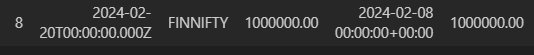
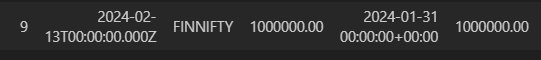

In [276]:
winsorized_df_2 = combined_df.copy()
# Convert columns to numeric type
winsorized_df_2['open'] = pd.to_numeric(winsorized_df_2['open'], errors='coerce')
winsorized_df_2['high'] = pd.to_numeric(winsorized_df_2['high'], errors='coerce')
winsorized_df_2['low'] = pd.to_numeric(winsorized_df_2['low'], errors='coerce')
winsorized_df_2['close'] = pd.to_numeric(winsorized_df_2['close'], errors='coerce')
winsorized_df_2['overnightExpected'] = pd.to_numeric(winsorized_df_2['overnightExpected'], errors='coerce')
winsorized_df_2['intradayTotal'] = pd.to_numeric(winsorized_df_2['intradayTotal'], errors='coerce')


# Applying winsorization to handle extreme values
threshold = 0.75  # Percentile threshold for winsorization
winsorized_df_2['open'] = winsorized_df_2['open'].clip(winsorized_df_2['open'].quantile(1 - threshold), winsorized_df_2['open'].quantile(threshold))
winsorized_df_2['high'] = winsorized_df_2['high'].clip(winsorized_df_2['high'].quantile(1 - threshold), winsorized_df_2['high'].quantile(threshold))
winsorized_df_2['low'] = winsorized_df_2['low'].clip(winsorized_df_2['low'].quantile(1 - threshold), winsorized_df_2['low'].quantile(threshold))
winsorized_df_2['close'] = winsorized_df_2['close'].clip(winsorized_df_2['close'].quantile(1 - threshold), winsorized_df_2['close'].quantile(threshold))
winsorized_df_2['overnightExpected'] = winsorized_df_2['overnightExpected'].clip(winsorized_df_2['overnightExpected'].quantile(1 - threshold), winsorized_df_2['overnightExpected'].quantile(threshold))
winsorized_df_2['intradayTotal'] = winsorized_df_2['intradayTotal'].clip(winsorized_df_2['intradayTotal'].quantile(1 - threshold), winsorized_df_2['intradayTotal'].quantile(threshold))

winsorized_df_2

,_id,daysToExpiry,expiry,index,close,date,high,index_close,index_high,index_low,index_open,intradayMovement,intradayTotal,low,open,overnightExpected,overnightGap
0,65b8e4d13fef031d7fc68295,9,2024-01-30T00:00:00.000Z,FINNIFTY,431.1875,2024-01-16 00:00:00+00:00,498.0125,21439.15,21510.30,21423.40,21444.75,86.90,45.5500,414.775,468.7000,-1.2125,461.30
1,65cb5c132f6ea590e695fe0a,9,2024-02-13T00:00:00.000Z,FINNIFTY,431.1875,2024-01-31 00:00:00+00:00,498.0125,20476.20,20585.00,20165.05,20207.50,419.95,18.0000,414.775,468.7000,16.8625,-50.70
2,65cb5c132f6ea590e695fdfa,8,2024-02-13T00:00:00.000Z,FINNIFTY,431.1875,2024-02-01 00:00:00+00:00,498.0125,20517.70,20567.05,20374.00,20526.90,193.05,29.0000,414.775,468.7000,-1.2125,-156.60
3,65c221202f6ea590e6c27802,3,2024-02-06T00:00:00.000Z,FINNIFTY,285.9000,2024-02-01 00:00:00+00:00,478.1500,20517.70,20567.05,20374.00,20526.90,193.05,71.6875,283.300,456.2500,16.8625,-156.60
4,65cb5c132f6ea590e695fde9,7,2024-02-13T00:00:00.000Z,FINNIFTY,417.1000,2024-02-02 00:00:00+00:00,498.0125,20414.15,20814.45,20412.60,20674.30,401.85,48.6000,340.300,465.7000,-1.2125,54.55
5,65c221202f6ea590e6c277e5,2,2024-02-06T00:00:00.000Z,FINNIFTY,240.5000,2024-02-02 00:00:00+00:00,280.6250,20414.15,20814.45,20412.60,20674.30,401.85,20.5500,235.900,271.1625,7.9000,54.55
6,65cb5c132f6ea590e695fdd4,6,2024-02-13T00:00:00.000Z,FINNIFTY,383.4500,2024-02-05 00:00:00+00:00,455.1000,20303.90,20450.55,20263.80,20359.60,186.75,71.3000,371.950,454.7500,-1.2125,42.30
7,65c221202f6ea590e6c277d4,1,2024-02-06T00:00:00.000Z,FINNIFTY,233.9375,2024-02-05 00:00:00+00:00,280.6250,20303.90,20450.55,20263.80,20359.60,186.75,59.7500,232.375,271.1625,16.8625,42.30
8,65c221202f6ea590e6c277bd,0,2024-02-06T00:00:00.000Z,FINNIFTY,233.9375,2024-02-06 00:00:00+00:00,280.6250,20386.15,20386.15,20247.95,20261.60,138.20,71.6875,232.375,271.1625,0.0000,0
9,65cb5c132f6ea590e695fdc6,5,2024-02-13T00:00:00.000Z,FINNIFTY,394.0500,2024-02-06 00:00:00+00:00,442.8500,20386.15,20386.15,20247.95,20261.60,138.20,18.0000,386.000,401.5000,16.8625,-120.15


In [277]:
# Feature Engineering

X_2 = winsorized_df[['open' , 'high' , 'low' , 'close' , 'daysToExpiry', 'intradayMovement', 'intradayTotal', 'overnightExpected', 'overnightGap']]

# Target Variables
y_2 = winsorized_df[['open', 'high', 'low', 'close']]

# Spliting the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# Model Selection and Training
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train_2, y_train_2)

# Model Evaluation
y_pred_2 = model.predict(X_test_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)

rmse_2 = mse_2 ** 0.5

print("Root Mean Squared Error:", rmse_2)


r2_open_2 = r2_score(y_test_2['open'], y_pred_2[:, 0])
r2_high_2 = r2_score(y_test_2['high'], y_pred_2[:, 1])
r2_low_2 = r2_score(y_test_2['low'], y_pred_2[:, 2])
r2_close_2 = r2_score(y_test_2['close'], y_pred_2[:, 3])

print("R-squared (R2) value for Open:", r2_open_2)
print("R-squared (R2) value for High:", r2_high_2)
print("R-squared (R2) value for Low:", r2_low_2)
print("R-squared (R2) value for Close:", r2_close_2)

Root Mean Squared Error: 30.95531027233676
R-squared (R2) value for Open: 0.8814956796960811
R-squared (R2) value for High: 0.8950176574089249
R-squared (R2) value for Low: 0.9039628557040623
R-squared (R2) value for Close: 0.8978328127016308


# **2. Using LSTM**

### Using LSTM model to predict next day's features

In [300]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_array, check_is_fitted
import matplotlib.pyplot as plt
import joblib

### Extracting data in a dataframe from the dtelist api

In [302]:
expiry_date = '2024-03-05T00:00:00.000Z'
temp_dte_list = fetch_data(dte_list_api + f"?index={index}&expiry={expiry_date}")
df = pd.DataFrame(temp_dte_list['result'])

### Preprocessing

In [303]:
# Preprocessing the data
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df

,_id,daysToExpiry,expiry,index,close,date,high,index_close,index_high,index_low,index_open,intradayMovement,intradayTotal,low,open,overnightExpected,overnightGap
9,65e70d796f2fdc852f72310a,9,2024-03-05T00:00:00.000Z,FINNIFTY,538.20,2024-02-21 00:00:00+00:00,590.65,20640.75,20872.45,20634.25,20838.40,238.20,-32.05,506.15,506.15,43.30,12.60
8,65e70d796f2fdc852f7230fc,8,2024-03-05T00:00:00.000Z,FINNIFTY,487.00,2024-02-22 00:00:00+00:00,1000000.00,20689.55,20698.70,20452.30,20628.15,246.40,7.90,466.90,494.90,-4.75,4.55
7,65e70d796f2fdc852f7230eb,7,2024-03-05T00:00:00.000Z,FINNIFTY,452.15,2024-02-23 00:00:00+00:00,501.35,20664.70,20793.65,20647.60,20685.00,146.05,39.60,431.00,491.75,-0.80,-28.05
6,65e70d796f2fdc852f7230d8,6,2024-03-05T00:00:00.000Z,FINNIFTY,435.80,2024-02-26 00:00:00+00:00,483.90,20613.45,20719.00,20599.65,20692.75,119.35,17.15,425.30,452.95,24.45,34.35
5,65e70d796f2fdc852f7230c8,5,2024-03-05T00:00:00.000Z,FINNIFTY,394.45,2024-02-27 00:00:00+00:00,451.90,20564.90,20626.10,20535.00,20579.10,91.10,16.90,394.45,411.35,17.55,-11.10
4,65e70d796f2fdc852f7230b0,4,2024-03-05T00:00:00.000Z,FINNIFTY,403.40,2024-02-28 00:00:00+00:00,416.50,20318.40,20625.75,20317.80,20576.00,307.95,-26.50,339.80,376.90,12.40,11.10
3,65e70d796f2fdc852f7230a4,3,2024-03-05T00:00:00.000Z,FINNIFTY,275.60,2024-02-29 00:00:00+00:00,391.00,20469.95,20489.40,20242.75,20307.30,246.65,115.40,271.55,391.00,6.80,-88.95
2,65e70d796f2fdc852f72308d,2,2024-03-05T00:00:00.000Z,FINNIFTY,237.50,2024-03-01 00:00:00+00:00,277.90,20821.00,20859.20,20540.15,20558.90,319.05,31.30,236.20,268.80,37.90,-48.45
1,65e70d796f2fdc852f723079,1,2024-03-05T00:00:00.000Z,FINNIFTY,133.20,2024-03-04 00:00:00+00:00,206.95,20916.40,20952.95,20813.45,20869.45,139.50,66.40,133.20,199.60,16.45,74.30
0,65e70d796f2fdc852f723066,0,2024-03-05T00:00:00.000Z,FINNIFTY,4.40,2024-03-05 00:00:00+00:00,117.95,20858.10,20951.55,20822.10,20842.10,129.45,112.35,3.75,116.75,0,0


In [304]:
# Convert relevant columns to numeric data types
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df['open'] = pd.to_numeric(df['open'], errors='coerce')

### Using winsorization to handle outliers

In [305]:
winsorized_df_lstm = df.copy()

threshold = 0.75  # Percentile threshold for winsorization
winsorized_df_lstm['open'] = winsorized_df_lstm['open'].clip(winsorized_df_lstm['open'].quantile(1 - threshold), winsorized_df_lstm['open'].quantile(threshold))
winsorized_df_lstm['high'] = winsorized_df_lstm['high'].clip(winsorized_df_lstm['high'].quantile(1 - threshold), winsorized_df_lstm['high'].quantile(threshold))
winsorized_df_lstm['low'] = winsorized_df_lstm['low'].clip(winsorized_df_lstm['low'].quantile(1 - threshold), winsorized_df_lstm['low'].quantile(threshold))
winsorized_df_lstm['close'] = winsorized_df_lstm['close'].clip(winsorized_df_lstm['close'].quantile(1 - threshold), winsorized_df_lstm['close'].quantile(threshold))

winsorized_df_lstm

,_id,daysToExpiry,expiry,index,close,date,high,index_close,index_high,index_low,index_open,intradayMovement,intradayTotal,low,open,overnightExpected,overnightGap
9,65e70d796f2fdc852f72310a,9,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-21 00:00:00+00:00,496.9875,20640.75,20872.45,20634.25,20838.40,238.20,-32.05,429.5750,482.050,43.30,12.60
8,65e70d796f2fdc852f7230fc,8,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-22 00:00:00+00:00,496.9875,20689.55,20698.70,20452.30,20628.15,246.40,7.90,429.5750,482.050,-4.75,4.55
7,65e70d796f2fdc852f7230eb,7,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-23 00:00:00+00:00,496.9875,20664.70,20793.65,20647.60,20685.00,146.05,39.60,429.5750,482.050,-0.80,-28.05
6,65e70d796f2fdc852f7230d8,6,2024-03-05T00:00:00.000Z,FINNIFTY,435.8000,2024-02-26 00:00:00+00:00,483.9000,20613.45,20719.00,20599.65,20692.75,119.35,17.15,425.3000,452.950,24.45,34.35
5,65e70d796f2fdc852f7230c8,5,2024-03-05T00:00:00.000Z,FINNIFTY,394.4500,2024-02-27 00:00:00+00:00,451.9000,20564.90,20626.10,20535.00,20579.10,91.10,16.90,394.4500,411.350,17.55,-11.10
4,65e70d796f2fdc852f7230b0,4,2024-03-05T00:00:00.000Z,FINNIFTY,403.4000,2024-02-28 00:00:00+00:00,416.5000,20318.40,20625.75,20317.80,20576.00,307.95,-26.50,339.8000,376.900,12.40,11.10
3,65e70d796f2fdc852f7230a4,3,2024-03-05T00:00:00.000Z,FINNIFTY,275.6000,2024-02-29 00:00:00+00:00,391.0000,20469.95,20489.40,20242.75,20307.30,246.65,115.40,271.5500,391.000,6.80,-88.95
2,65e70d796f2fdc852f72308d,2,2024-03-05T00:00:00.000Z,FINNIFTY,247.0250,2024-03-01 00:00:00+00:00,306.1750,20821.00,20859.20,20540.15,20558.90,319.05,31.30,245.0375,295.825,37.90,-48.45
1,65e70d796f2fdc852f723079,1,2024-03-05T00:00:00.000Z,FINNIFTY,247.0250,2024-03-04 00:00:00+00:00,306.1750,20916.40,20952.95,20813.45,20869.45,139.50,66.40,245.0375,295.825,16.45,74.30
0,65e70d796f2fdc852f723066,0,2024-03-05T00:00:00.000Z,FINNIFTY,247.0250,2024-03-05 00:00:00+00:00,306.1750,20858.10,20951.55,20822.10,20842.10,129.45,112.35,245.0375,295.825,0,0


### Extracting Relevant Features

### Using only given features

In [306]:
# features to be used as input
features = [
    'daysToExpiry', 'close', 'high', 'low', 'open',
    'intradayMovement', 'intradayTotal', 'index_close',
    'index_high', 'index_low', 'index_open',
    'overnightExpected', 'overnightGap'
]

# Extracting the selected features from the DataFrame
X = winsorized_df_lstm[features].copy().values
X = X[:-1]

#Scaling the numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Defining Target Variables
# Defining the target variable as (next day's 'open', 'high', 'low', 'close')
# Shifting the 'open', 'high', 'low', 'close' columns to get the next day's values
winsorized_df_lstm[['open_next', 'high_next', 'low_next', 'close_next']] = winsorized_df_lstm[['open', 'high', 'low', 'close']].shift(-1)

# Droping the last row since it doesn't have target values
winsorized_df_lstm.dropna(inplace=True)



X = winsorized_df_lstm[features].values
y = winsorized_df_lstm[['open_next', 'high_next', 'low_next', 'close_next']].values


X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Reshaping the input features for LSTM (by adding a new axis)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))


X_next_day = X_scaled[-1].reshape(1, 1, -1)  # Using the last row of scaled X as input for next day prediction
# winsorized_df_lstm

In [307]:
winsorized_df_lstm

,_id,daysToExpiry,expiry,index,close,date,high,index_close,index_high,index_low,...,intradayMovement,intradayTotal,low,open,overnightExpected,overnightGap,open_next,high_next,low_next,close_next
9,65e70d796f2fdc852f72310a,9,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-21 00:00:00+00:00,496.9875,20640.75,20872.45,20634.25,...,238.20,-32.05,429.5750,482.050,43.30,12.60,482.050,496.9875,429.5750,448.0625
8,65e70d796f2fdc852f7230fc,8,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-22 00:00:00+00:00,496.9875,20689.55,20698.70,20452.30,...,246.40,7.90,429.5750,482.050,-4.75,4.55,482.050,496.9875,429.5750,448.0625
7,65e70d796f2fdc852f7230eb,7,2024-03-05T00:00:00.000Z,FINNIFTY,448.0625,2024-02-23 00:00:00+00:00,496.9875,20664.70,20793.65,20647.60,...,146.05,39.60,429.5750,482.050,-0.80,-28.05,452.950,483.9000,425.3000,435.8000
6,65e70d796f2fdc852f7230d8,6,2024-03-05T00:00:00.000Z,FINNIFTY,435.8000,2024-02-26 00:00:00+00:00,483.9000,20613.45,20719.00,20599.65,...,119.35,17.15,425.3000,452.950,24.45,34.35,411.350,451.9000,394.4500,394.4500
5,65e70d796f2fdc852f7230c8,5,2024-03-05T00:00:00.000Z,FINNIFTY,394.4500,2024-02-27 00:00:00+00:00,451.9000,20564.90,20626.10,20535.00,...,91.10,16.90,394.4500,411.350,17.55,-11.10,376.900,416.5000,339.8000,403.4000
4,65e70d796f2fdc852f7230b0,4,2024-03-05T00:00:00.000Z,FINNIFTY,403.4000,2024-02-28 00:00:00+00:00,416.5000,20318.40,20625.75,20317.80,...,307.95,-26.50,339.8000,376.900,12.40,11.10,391.000,391.0000,271.5500,275.6000
3,65e70d796f2fdc852f7230a4,3,2024-03-05T00:00:00.000Z,FINNIFTY,275.6000,2024-02-29 00:00:00+00:00,391.0000,20469.95,20489.40,20242.75,...,246.65,115.40,271.5500,391.000,6.80,-88.95,295.825,306.1750,245.0375,247.0250
2,65e70d796f2fdc852f72308d,2,2024-03-05T00:00:00.000Z,FINNIFTY,247.0250,2024-03-01 00:00:00+00:00,306.1750,20821.00,20859.20,20540.15,...,319.05,31.30,245.0375,295.825,37.90,-48.45,295.825,306.1750,245.0375,247.0250
1,65e70d796f2fdc852f723079,1,2024-03-05T00:00:00.000Z,FINNIFTY,247.0250,2024-03-04 00:00:00+00:00,306.1750,20916.40,20952.95,20813.45,...,139.50,66.40,245.0375,295.825,16.45,74.30,295.825,306.1750,245.0375,247.0250


## Model Training

### Fine tuning LSTM Model
    Using the parameter grid as 
    param_grid = {
    'units': [50, 100, 150],  
    'dropout_rate': [0.2, 0.3, 0.4],   
    'optimizer': ['adam', 'rmsprop']
    }


In [308]:
# # # Define the LSTM model_lstm
# # def create_lstm_model(units=50, dropout_rate=0.2, optimizer='adam'):
# #     model_lstm = Sequential()
# #     model_lstm.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])))
# #     model_lstm.add(Dropout(dropout_rate))
# #     model_lstm.add(Dense(4))  # 4 output neurons for 'open', 'high', 'low', 'close'
# #     model_lstm.compile(loss='mean_squared_error', optimizer=optimizer)
# #     return model_lstm

# # Wrap the model_lstm using KerasRegressor
# # lstm_model = KerasRegressor(build_fn=create_lstm_model, epochs=50, batch_size=32, verbose=0)

# lstm_model = KerasLSTMRegressor()

# # Define the hyperparameter grid
# param_grid = {
#     'units': [50, 100, 150],
#     'dropout_rate': [0.2, 0.3, 0.4],
#     'optimizer': ['adam', 'rmsprop']
# }

# # Scale the input features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Perform grid search
# grid_search = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=3, verbose=2)
# grid_search_result = grid_search.fit(X_scaled, y)

# # Summarize results
# print("Best: %f using %s" % (grid_search_result.best_score_, grid_search_result.best_params_))
# means = grid_search_result.cv_results_['mean_test_score']
# stds = grid_search_result.cv_results_['std_test_score']
# params = grid_search_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

## Model Training
    After Fine tuning of Hyperparameters 
    Using : units = 150 , Dropout = 0.2 , Optimizer = 'Adam'

    Training the model for 5000 epochs to plot validation loss vs epochs 
    and get idea of min validation loss and optimal number of epochs


Epoch 1/5000
1/1 [==============================] - 20s 20s/step - loss: 163412.8281 - val_loss: 75577.7344
Epoch 2/5000
1/1 [==============================] - 0s 59ms/step - loss: 163409.0312 - val_loss: 75575.3594
Epoch 3/5000
1/1 [==============================] - 0s 43ms/step - loss: 163404.5156 - val_loss: 75572.8281
Epoch 4/5000
1/1 [==============================] - 0s 46ms/step - loss: 163399.6406 - val_loss: 75570.0625
Epoch 5/5000
1/1 [==============================] - 0s 51ms/step - loss: 163395.3281 - val_loss: 75566.9688
Epoch 6/5000
1/1 [==============================] - 0s 48ms/step - loss: 163390.4219 - val_loss: 75563.4531
Epoch 7/5000
1/1 [==============================] - 0s 212ms/step - loss: 163383.6719 - val_loss: 75559.4219
Epoch 8/5000
1/1 [==============================] - 0s 58ms/step - loss: 163376.1406 - val_loss: 75554.7500
Epoch 9/5000
1/1 [==============================] - 0s 67ms/step - loss: 163365.5781 - val_loss: 75549.3438
Epoch 10/5000
1/1 [========

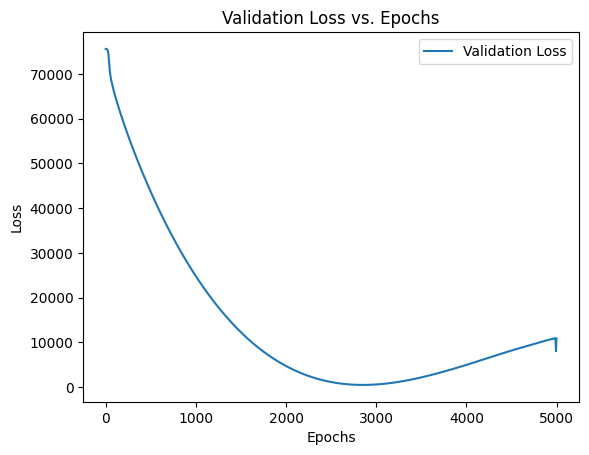

In [245]:

model_lstm = Sequential()
model_lstm.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=150, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=150))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=4))  # Output layer with 4 units for Open, High, Low, Close

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training the model_lstm for 5000 epochs 
# to plot validation loss vs epochs 
# and get idea of min validation loss and optimal number of epochs

history = model_lstm.fit(X_train, y_train, epochs=5000, batch_size=128, validation_data=(X_val, y_val), verbose=1)

# Ploting validation loss vs. epochs 
# ( to get idea about min validation loss)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Epochs')
plt.legend()
plt.show()


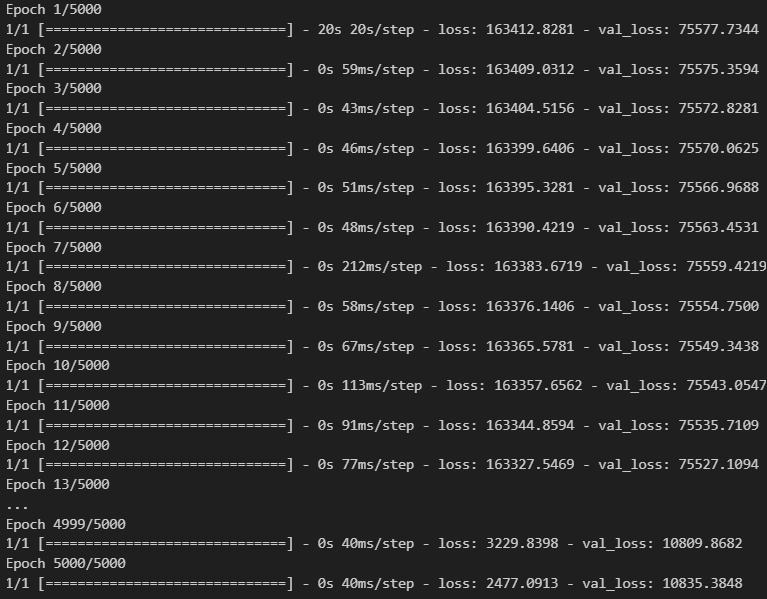

### Model Evaluation
    Finding min validation loss and optimum number of epochs 

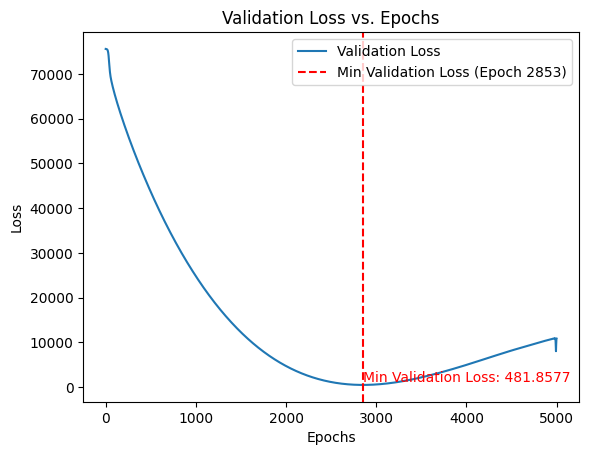

In [247]:
# Plot validation loss vs. epochs
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Epochs')

# Find the epoch at which validation loss was minimum
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = history.history['val_loss'][min_val_loss_epoch]

# Mark the point corresponding to minimum validation loss
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--', label=f'Min Validation Loss (Epoch {min_val_loss_epoch + 1})')
plt.text(min_val_loss_epoch, min_val_loss, f'Min Validation Loss: {min_val_loss:.4f}', color='r', va='bottom')

plt.legend()
plt.show()

    Performance Evaluation of model after 5000 epochs

In [248]:
# Evaluate model_lstm performance on the validation set
val_loss = model_lstm.evaluate(X_val, y_val, verbose=0)
print("Validation Loss:", val_loss)

# Optionally, make predictions on the validation set and calculate evaluation metrics
y_pred = model_lstm.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Validation Loss: 10835.384765625
1/1 [==============================] - 3s 3s/step
Mean Squared Error: 10835.384732908642


In [249]:
print(y_pred)
print(y_val)

[[387.8078  402.09195 350.99924 364.37012]
 [389.51218 403.8573  352.542   365.9707 ]]
[[295.825  306.175  245.0375 247.025 ]
 [295.825  306.175  245.0375 247.025 ]]


### Model Training 
    For 3000 epochs after the above analysis

In [310]:
# Define the LSTM model_lstm architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=150, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=150))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=4))  # Output layer with 4 units for Open, High, Low, Close

# Compile the model_lstm
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model_lstm
history = model_lstm.fit(X_train, y_train, epochs=2850, batch_size=128, validation_data=(X_val, y_val), verbose=1)

# # Plot validation loss vs. epochs
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Validation Loss vs. Epochs')
# plt.legend()
# plt.show()

Epoch 1/2850
1/1 [==============================] - 12s 12s/step - loss: 163412.5312 - val_loss: 75577.4922
Epoch 2/2850
1/1 [==============================] - 0s 43ms/step - loss: 163408.2188 - val_loss: 75574.8359
Epoch 3/2850
1/1 [==============================] - 0s 151ms/step - loss: 163403.7188 - val_loss: 75572.0000
Epoch 4/2850
1/1 [==============================] - 0s 242ms/step - loss: 163398.3594 - val_loss: 75568.8906
Epoch 5/2850
1/1 [==============================] - 0s 59ms/step - loss: 163394.3281 - val_loss: 75565.4062
Epoch 6/2850
1/1 [==============================] - 0s 55ms/step - loss: 163388.1406 - val_loss: 75561.4609
Epoch 7/2850
1/1 [==============================] - 0s 58ms/step - loss: 163380.6250 - val_loss: 75556.9219
Epoch 8/2850
1/1 [==============================] - 0s 73ms/step - loss: 163372.5781 - val_loss: 75551.6719
Epoch 9/2850
1/1 [==============================] - 0s 67ms/step - loss: 163364.4219 - val_loss: 75545.5938
Epoch 10/2850
1/1 [=======

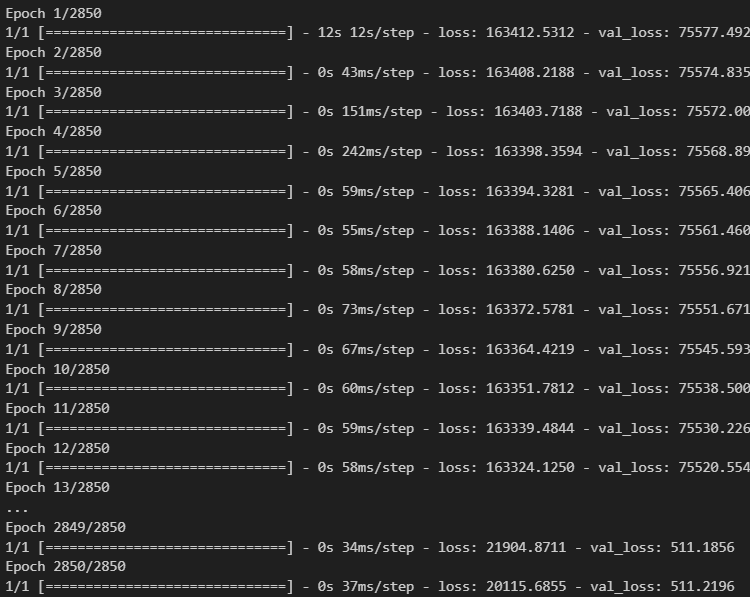

In [311]:
# Saving the trained model
joblib.dump(model, 'lstm_model.pkl')

['lstm_model.pkl']

    Evaluating model performance after 2850 epochs

In [313]:
# Evaluating model performance on the validation set
# 3000 epochs
val_loss = model_lstm.evaluate(X_val, y_val, verbose=0)
print("Validation Loss:", val_loss)

y_pred = model_lstm.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Validation Loss: 511.2196044921875
1/1 [==============================] - 2s 2s/step
Mean Squared Error: 511.2196681930444


In [314]:
print(f'ypred:{y_pred}')
print(f'y_val:{y_val}')

ypred:[[278.98535 281.64536 267.63556 272.49908]
 [278.9855  281.64554 267.63574 272.4992 ]]
y_val:[[295.825  306.175  245.0375 247.025 ]
 [295.825  306.175  245.0375 247.025 ]]
